# Validation of Detuning

In this file, we numerically validate the detuning calculated in Appendix C of the paper. Calculating these integrals can be a bit tedious, so in this file I show that I did it correctly. Given the poor convergence of the correction terms, the calculated detuning is inherently inaccurate for $t_g<2t_c$. At the beginning of the file, you can set some parameters that you might want to change, for example $\phi$, $t_0$ and $\lambda$.

Note that the solutions to the integrals are generally an infinite series of which the terms scale with $(t_c/t_g)^k$. For some integrals, a higher truncation of $k$ is needed compared to other integrals for an accurate solution. At each integral, the truncation order is indicated.

# Init

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sqgbrwa.utils import *
from sqgbrwa.pulse_envelopes import *
from sqgbrwa.magnus_approximation import *
from sqgbrwa.pulse_parameters import *
from sqgbrwa.time_solvers import *

In [2]:
# Ensure font sizes are large enough to read
poster_sizes = [24, 26, 28]
paper_sizes = [16, 18, 20]
presentation_sizes = [14, 16, 18]
SMALL_SIZE  = presentation_sizes[0]
MEDIUM_SIZE = presentation_sizes[1]
BIGGER_SIZE = presentation_sizes[2]

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

# Define functions

In [60]:
def numerical_integration(fun,
                          t1: float,
                          t2: float,
                          *args,
                          **kwargs):
    f = lambda y,x: fun(t1=x,t2=y,*args,**kwargs)
    val,err = scipy.integrate.dblquad(f, t1, t2, t1, lambda x: x, epsabs=1e-11, epsrel=1e-11)
    return val

# Define parameters

In [61]:
# Drive frequency
wd = 2*np.pi*80e6
# lambda
_lambda = 1/2/wd
# Gate durations
tgs = np.linspace(1.9*np.pi/wd, 10*np.pi/wd, 50)
# Carrier phase
phi = 0
# Magnus interval and t0
tc = np.pi/wd
t0 = 0*tc # Make sure this is 0<t0<tc
# Calculate beta
beta = 2*phi + 2*wd*t0

In [62]:
if not 0<=t0<=tc:
    raise ValueError("As indicated, please set 0<=t0<=tc, otherwise the world might go up in flames.")

# Validate integrals

## Integral 1

$\frac{1}{4}\int_{t_0+(n-m)t_c}^{t_0+nt_c}dt_1 \int_{t_0+(n-m)t_c}^{t_1}dt_2 \Big(\mathcal{E}_x(t_1)\mathcal{E}_x(t_2)\sin(2\omega_dt_2+2\phi) - \mathcal{E}_x(t_1)\sin(2\omega_dt_1+2\phi)\mathcal{E}_x(t_2)\Big)$

Integral computed up to 4th order in $t_c/t_g$

In [ ]:
from sqgbrwa.pulse_parameters import (
    integral1_numerical,
    integral1_analytical,
)

## Integral 2

$\frac{1}{4}\int_{t_0+(n-m)t_c}^{t_0+nt_c}dt_1 \int_{t_0+(n-m)t_c}^{t_1}dt_2 \Big(\mathcal{E}_x(t_1)\mathcal{E}_y(t_2) - \mathcal{E}_y(t_1)\mathcal{E}_x(t_2)\Big)$

Integral computed exactly (up to arbitrary order in $t_c/t_g$)

In [ ]:
from sqgbrwa.pulse_parameters import (
    integral2_numerical,
    integral2_analytical,
)

## Integral 3

$\frac{1}{4}\int_{t_0+(n-m)t_c}^{t_0+nt_c}dt_1 \int_{t_0+(n-m)t_c}^{t_1}dt_2 \Big(\mathcal{E}_x(t_1)\cos(2\omega_dt_1+2\phi)\mathcal{E}_x(t_2)\sin(2\omega_dt_2+2\phi) - \mathcal{E}_x(t_1)\sin(2\omega_dt_1+2\phi)\mathcal{E}_x(t_2)\cos(2\omega_dt_2+2\phi) \Big)$

Integral computed up to 1st order in $t_c/t_g$

In [ ]:
from sqgbrwa.pulse_parameters import (
    integral3_numerical,
    integral3_analytical,
)

## Integral 4

$-\frac{1}{4}\int_{t_0+(n-m)t_c}^{t_0+nt_c}dt_1 \int_{t_0+(n-m)t_c}^{t_1}dt_2 \Big(\mathcal{E}_x(t_1)\mathcal{E}_y(t_2)\cos(2\omega_dt_2+2\phi) - \mathcal{E}_x(t_2)\mathcal{E}_y(t_1)\cos(2\omega_dt_1+2\phi)\Big)$

Integral computed up to 5th order in $t_c/t_g$

In [ ]:
from sqgbrwa.pulse_parameters import (
    integral4_numerical,
    integral4_analytical,
)

## Integral 5

$\frac{1}{4}\int_{t_0+(n-m)t_c}^{t_0+nt_c}dt_1 \int_{t_0+(n-m)t_c}^{t_1}dt_2 \Big(\mathcal{E}_x(t_1)\cos(2\omega_dt_1+2\phi)\mathcal{E}_y(t_2)-\mathcal{E}_x(t_2)\cos(2\omega_dt_2+2\phi)\mathcal{E}_y(t_1)\Big)$

Integral computed up to 3rd order in $t_c/t_g$

In [ ]:
from sqgbrwa.pulse_parameters import (
    integral5_numerical,
    integral5_analytical,
)

## Integral 6

$-\frac{1}{4}\int_{t_0+(n-m)t_c}^{t_0+nt_c}dt_1 \int_{t_0+(n-m)t_c}^{t_1}dt_2 \Big(\mathcal{E}_x(t_1)\cos(2\omega_dt_1+2\phi)\mathcal{E}_y(t_2)\cos(2\omega_dt_2+2\phi) - \mathcal{E}_y(t_1)\cos(2\omega_dt_1+2\phi)\mathcal{E}_x(t_2)\cos(2\omega_dt_2+2\phi)\Big)$

Integral computed up to 2nd order in $t_c/t_g$

In [ ]:
from sqgbrwa.pulse_parameters import (
    integral6_numerical,
    integral6_analytical,
)

## Integral 7

$\frac{1}{4}\int_{t_0+(n-m)t_c}^{t_0+nt_c}dt_1 \int_{t_0+(n-m)t_c}^{t_1}dt_2 \Big( \mathcal{E}_y(t_1)\sin(2\omega_dt_1+2\phi)\mathcal{E}_y(t_2) - \mathcal{E}_y(t_1)\sin(2\omega_dt_2+2\phi)\mathcal{E}_y(t_2)\Big)$

Integral computed up to 1st order in $t_c/t_g$

In [ ]:
from sqgbrwa.pulse_parameters import (
    integral7_numerical,
    integral7_analytical,
)

## Integral 8

$-\frac{1}{4}\int_{t_0+(n-m)t_c}^{t_0+nt_c}dt_1 \int_{t_0+(n-m)t_c}^{t_1}dt_2 \Big(\mathcal{E}_y(t_1)\sin(2\omega_dt_1+2\phi)\mathcal{E}_y(t_2)\cos(2\omega_dt_2+2\phi) -\mathcal{E}_y(t_1)\cos(2\omega_dt_1+2\phi)\mathcal{E}_y(t_2)\sin(2\omega_dt_2+2\phi)\Big)$

Integral computed up to 1st order in $t_c/t_g$

In [ ]:
from sqgbrwa.pulse_parameters import (
    integral8_numerical,
    integral8_analytical,
)

## Integral 9

$-\frac{1}{4}\int_{t_0+(n-m)t_c}^{t_0+nt_c}dt_1 \int_{t_0+(n-m)t_c}^{t_1}dt_2 \Big( \mathcal{E}_y(t_1)\sin(2\omega_dt_1+2\phi)\mathcal{E}_x(t_2)\sin(2\omega_dt_2+2\phi)-\mathcal{E}_x(t_1)\sin(2\omega_dt_1+2\phi)\mathcal{E}_y(t_2)\sin(2\omega_dt_2+2\phi) \Big)$

Integral computed up to 2nd order in $t_c/t_g$

In [ ]:
from sqgbrwa.pulse_parameters import (
    integral9_numerical,
    integral9_analytical,
)

# Do actual computations

In [ ]:
numerical_integrals = [
    integral1_numerical,
    integral2_numerical,
    integral3_numerical,
    integral4_numerical,
    integral5_numerical,
    integral6_numerical,
    integral7_numerical,
    integral8_numerical,
    integral9_numerical,
]

analytical_integrals = [
    integral1_analytical,
    integral2_analytical,
    integral3_analytical,
    integral4_analytical,
    integral5_analytical,
    integral6_analytical,
    integral7_analytical,
    integral8_analytical,
    integral9_analytical,
]

sympy_integrals = analytical_detuning_comm_sympy_functions(K=15, processes=32)
# sympy_integrals = analytical_detuning_sympy_functions(K=15)

In [74]:
numerical_results = np.zeros((9, len(tgs)))
analytical_results = np.zeros((9, len(tgs)))
sympy_results = np.zeros((9, len(tgs)))

for i in range(9):
    for j,tg in enumerate(tgs):
        # Define time constants
        Nc = np.floor(tg / tc).astype(int)
        diff = (tg-Nc*tc)/2
        t1 = diff
        t2 = Nc*tc+diff
        phi = 0
        beta = 2*wd*t1 + 2*phi

        # Define pulse envelope and calcuate drive strength
        pulse_envelope = CosinePulseEnvelope(tg=tg)
        V0 = pulse_envelope.V0

        # Calculate lambda_hat
        lambda_hat = _lambda * np.pi/tg

        # Peform numerical integration
        numerical_results[i,j] = numerical_integration(fun=numerical_integrals[i],
                                                       t1=t1,
                                                       t2=t2,
                                                       pulse_envelope=pulse_envelope,
                                                       wd=wd,
                                                       phi=phi,
                                                       lambda_hat=lambda_hat)

        # Calculate analytical result
        analytical_results[i,j] = analytical_integrals[i](pulse_envelope=pulse_envelope,
                                                          t1=t1,
                                                          t2=t2,
                                                          wd=wd,
                                                          beta=beta,
                                                          lambda_hat=lambda_hat)
        
        # Calculate integral with sympy
        sympy_results[i,j] = sympy_integrals[i](wd=wd,
                                                tg=tg,
                                                beta=beta,
                                                ppp=lambda_hat,
                                                b_min=t1,
                                                b_plus=t2)

        # Add drive strength and divide by tg
        numerical_results[i,j]  *= 2 * V0**2 / tg
        analytical_results[i,j] *= 2 * V0**2 / tg
        sympy_results[i,j] *= 2 * V0**2 / tg

In [ ]:
## Script for commensurate sympy integrals
numerical_results = np.zeros((9, len(tgs)))
analytical_results = np.zeros((9, len(tgs)))
sympy_results = np.zeros((9, len(tgs)))

for i in range(9):
    print(i)
    for j,tg in enumerate(tgs):
        # Define time constants
        Nc = np.floor(tg / tc).astype(int)

        N = np.floor(tg/tc).astype(int)
        N_hat = np.round(tg/tc).astype(int)

        wd_hat = N_hat * np.pi/tg
        wd_tilde = wd - wd_hat

        beta = 2*phi

        # Define pulse envelope and calcuate drive strength
        pulse_envelope = CosinePulseEnvelope(tg=tg)
        V0 = pulse_envelope.V0

        # Calculate lambda_hat
        lambda_hat = _lambda * np.pi/tg

        # Peform numerical integration
        numerical_results[i,j] = numerical_integration(fun=numerical_integrals[i],
                                                       t1=0,
                                                       t2=tg,
                                                       pulse_envelope=pulse_envelope,
                                                       wd=wd,
                                                       phi=phi,
                                                       lambda_hat=lambda_hat)
        
        # Calculate integral with sympy
        sympy_results[i,j] = sympy_integrals[i](wd=wd_hat,
                                                wd_tilde=wd_tilde,
                                                tg=tg,
                                                beta=beta + wd_tilde*tg,
                                                ppp=lambda_hat,
                                                b_min=0,
                                                b_plus=tg)

        # Add drive strength and divide by tg
        numerical_results[i,j]  *= 2 * V0**2 / tg
        sympy_results[i,j] *= 2 * V0**2 / tg

In [75]:
# Convert to MHz
numerical_results *= 1e-6/(2*np.pi)
analytical_results *= 1e-6/(2*np.pi)
sympy_results *= 1e-6/(2*np.pi)

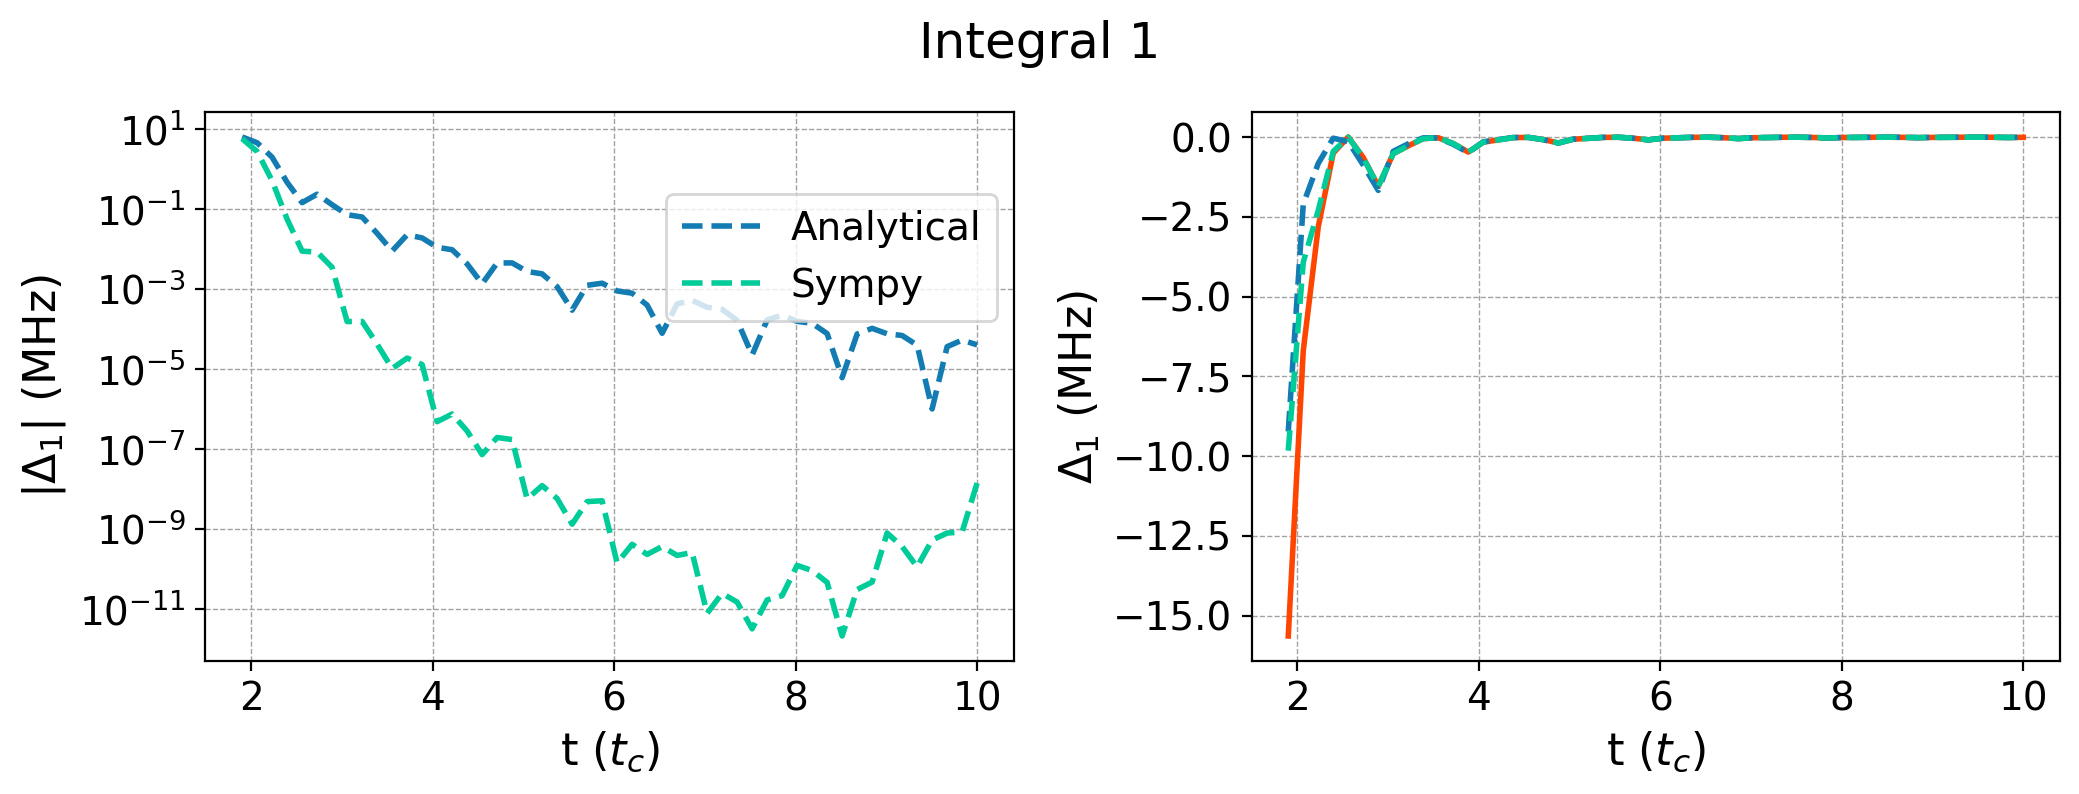

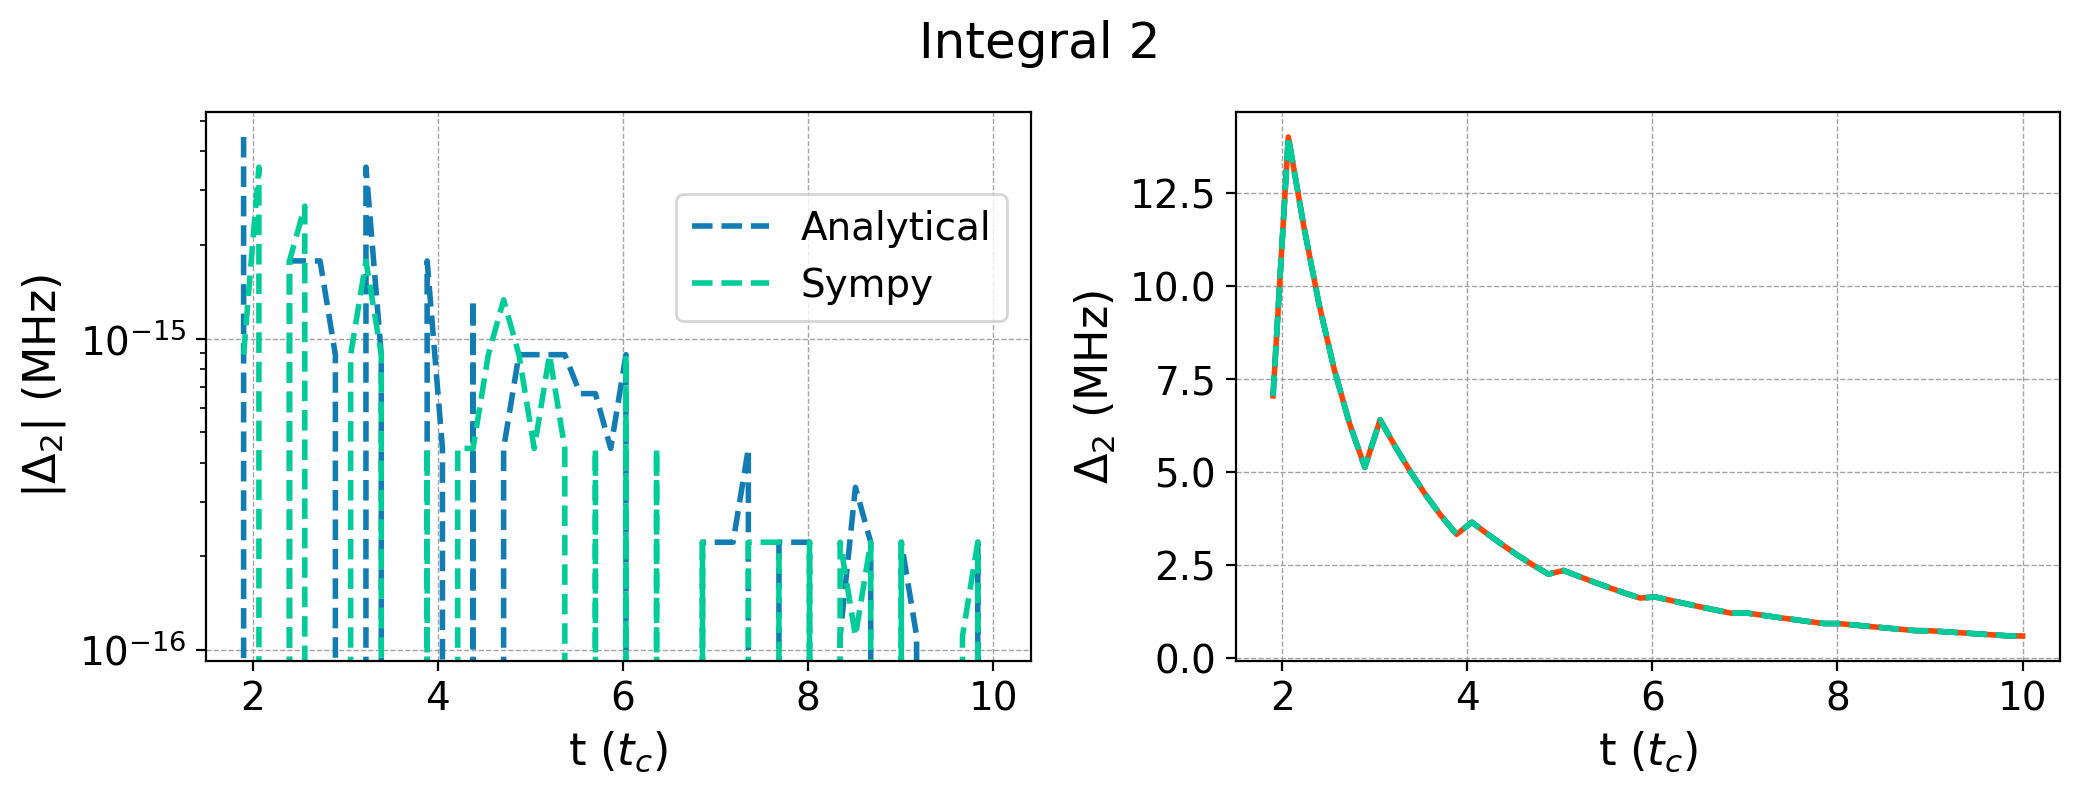

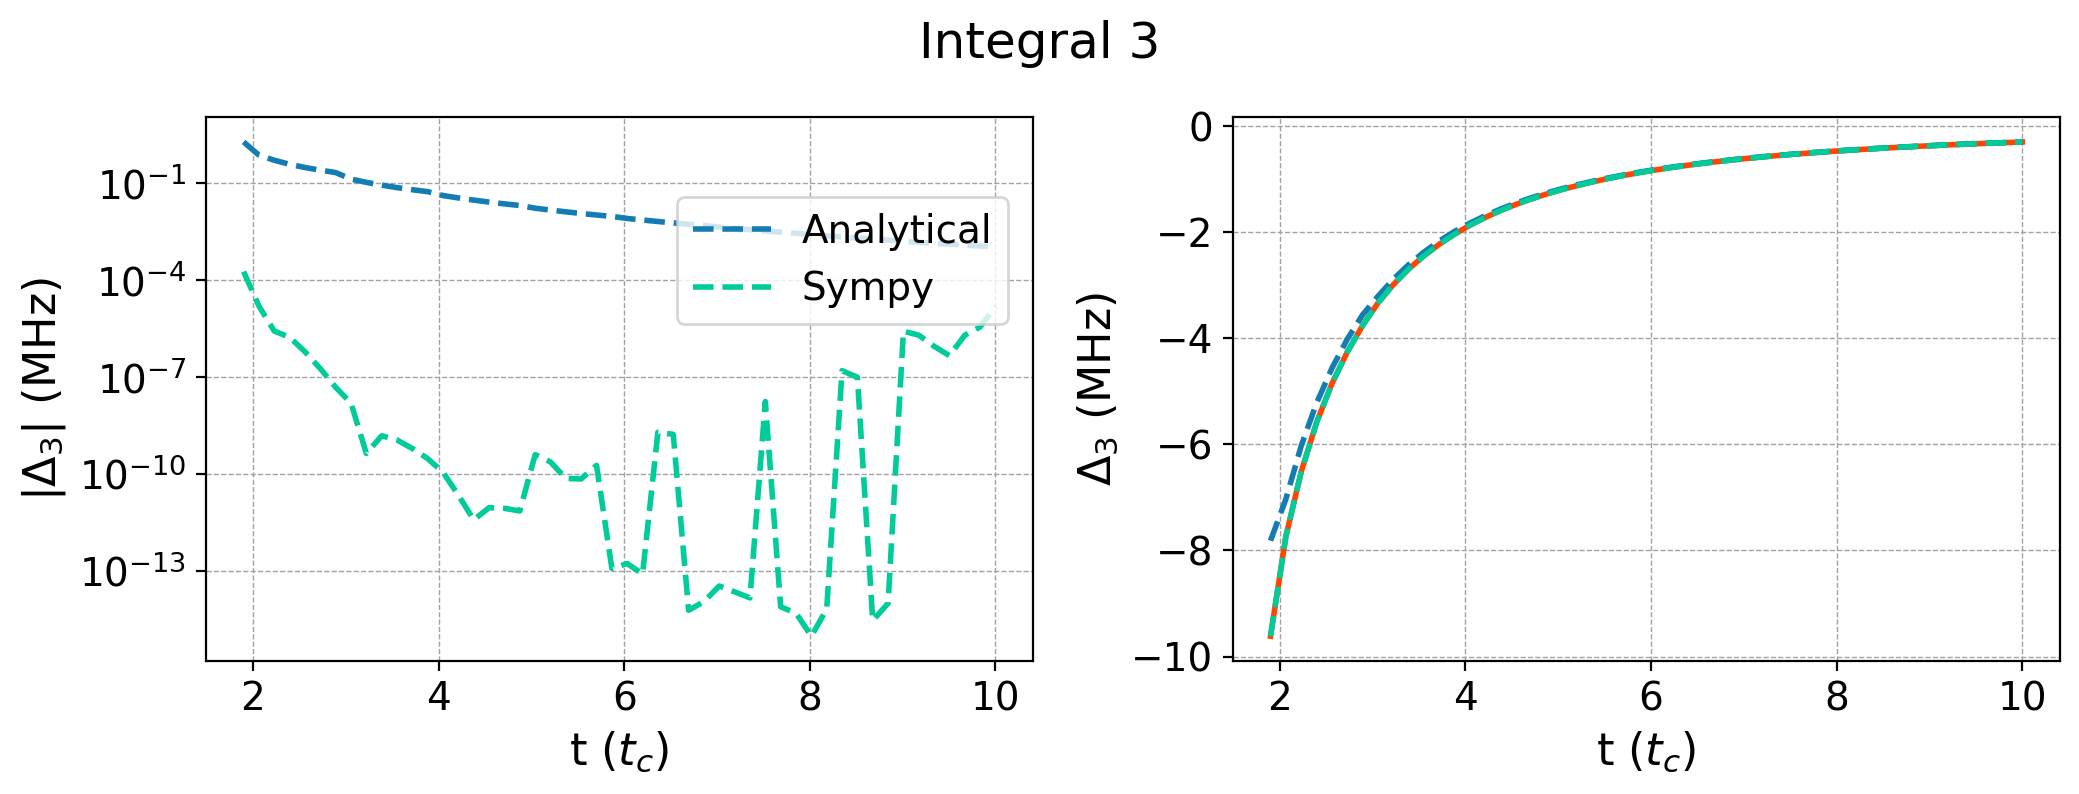

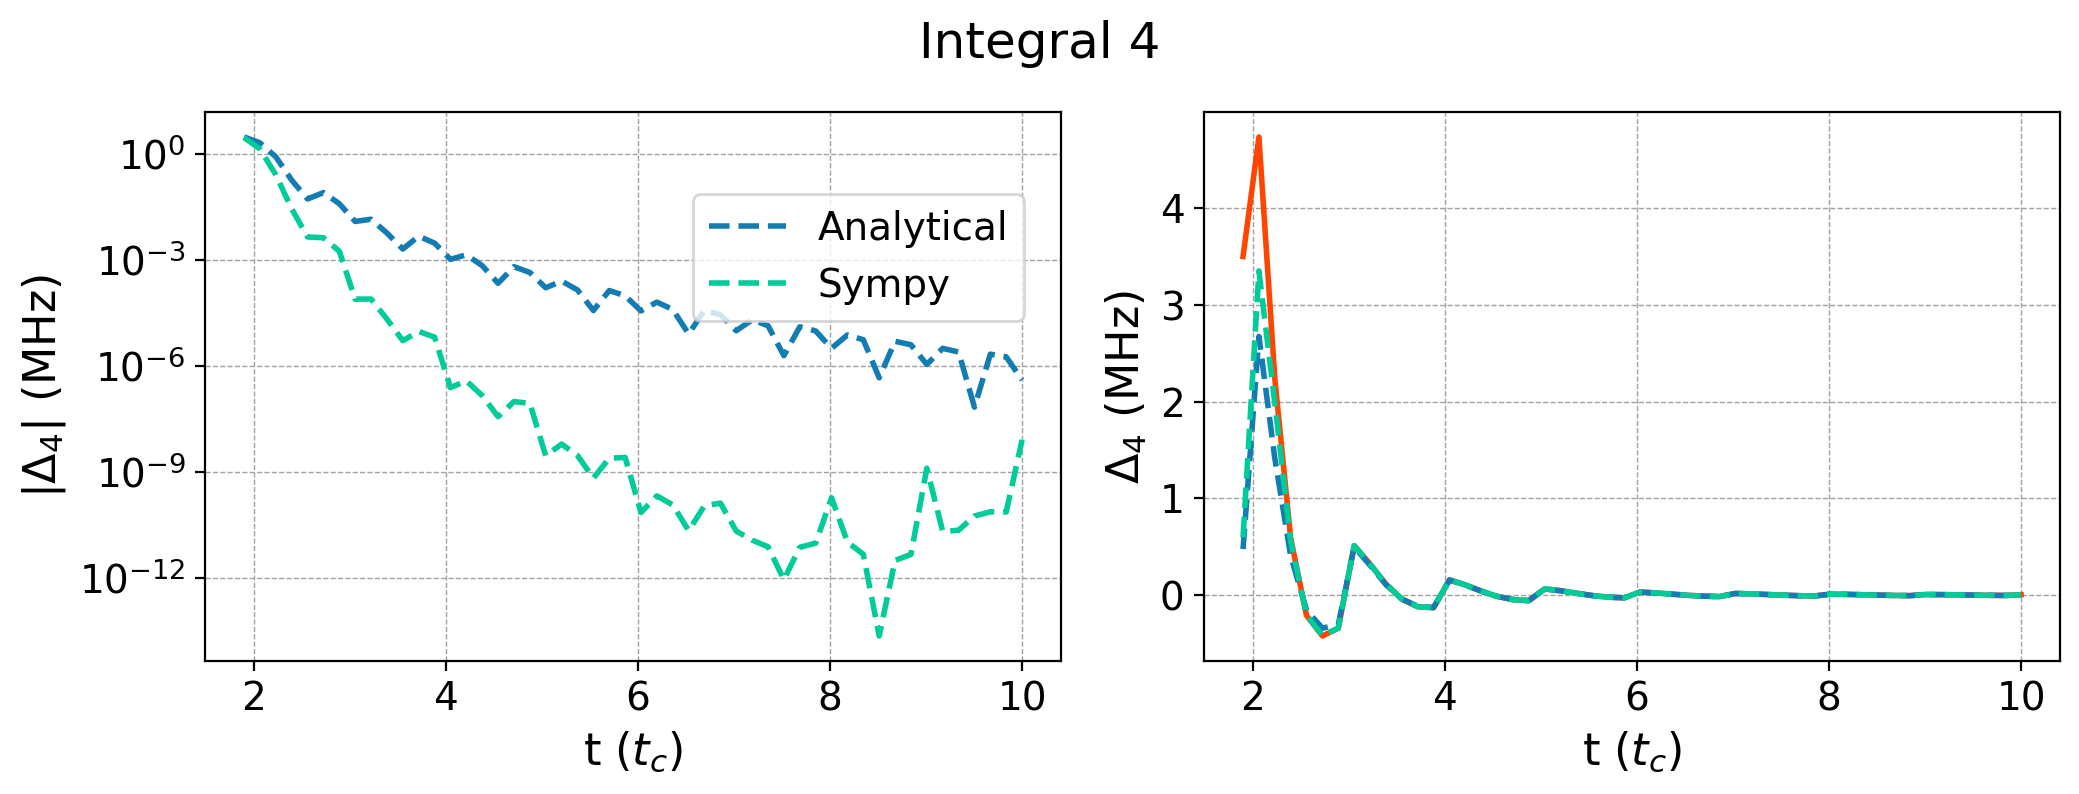

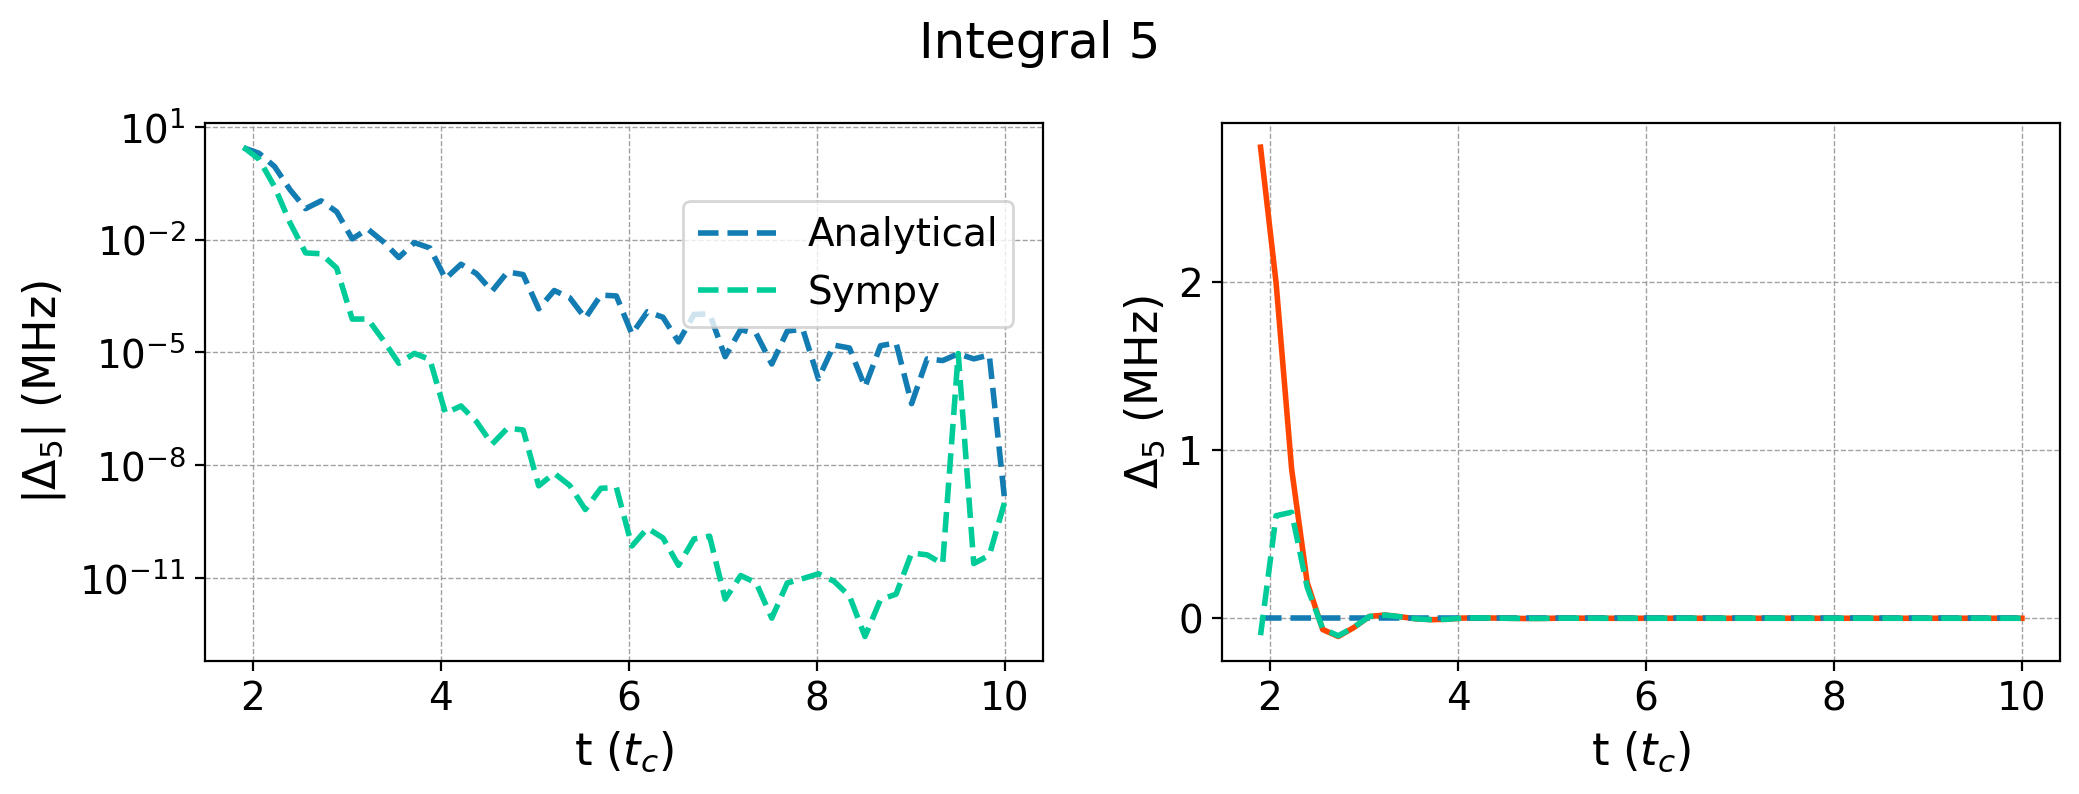

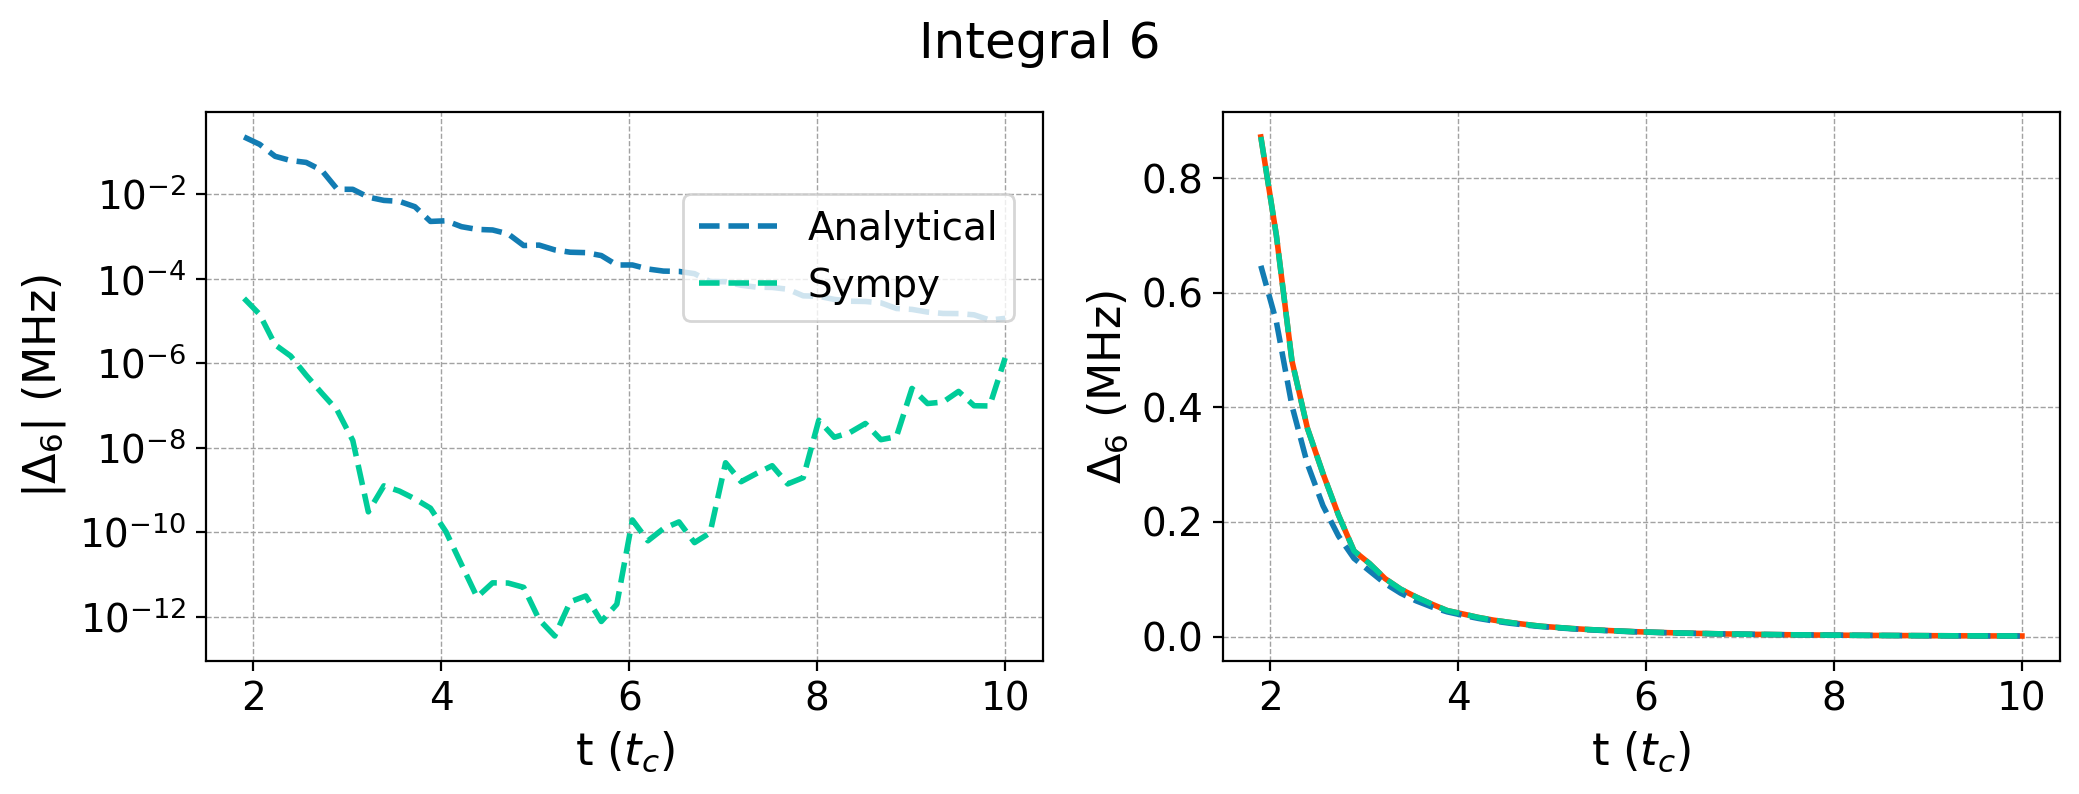

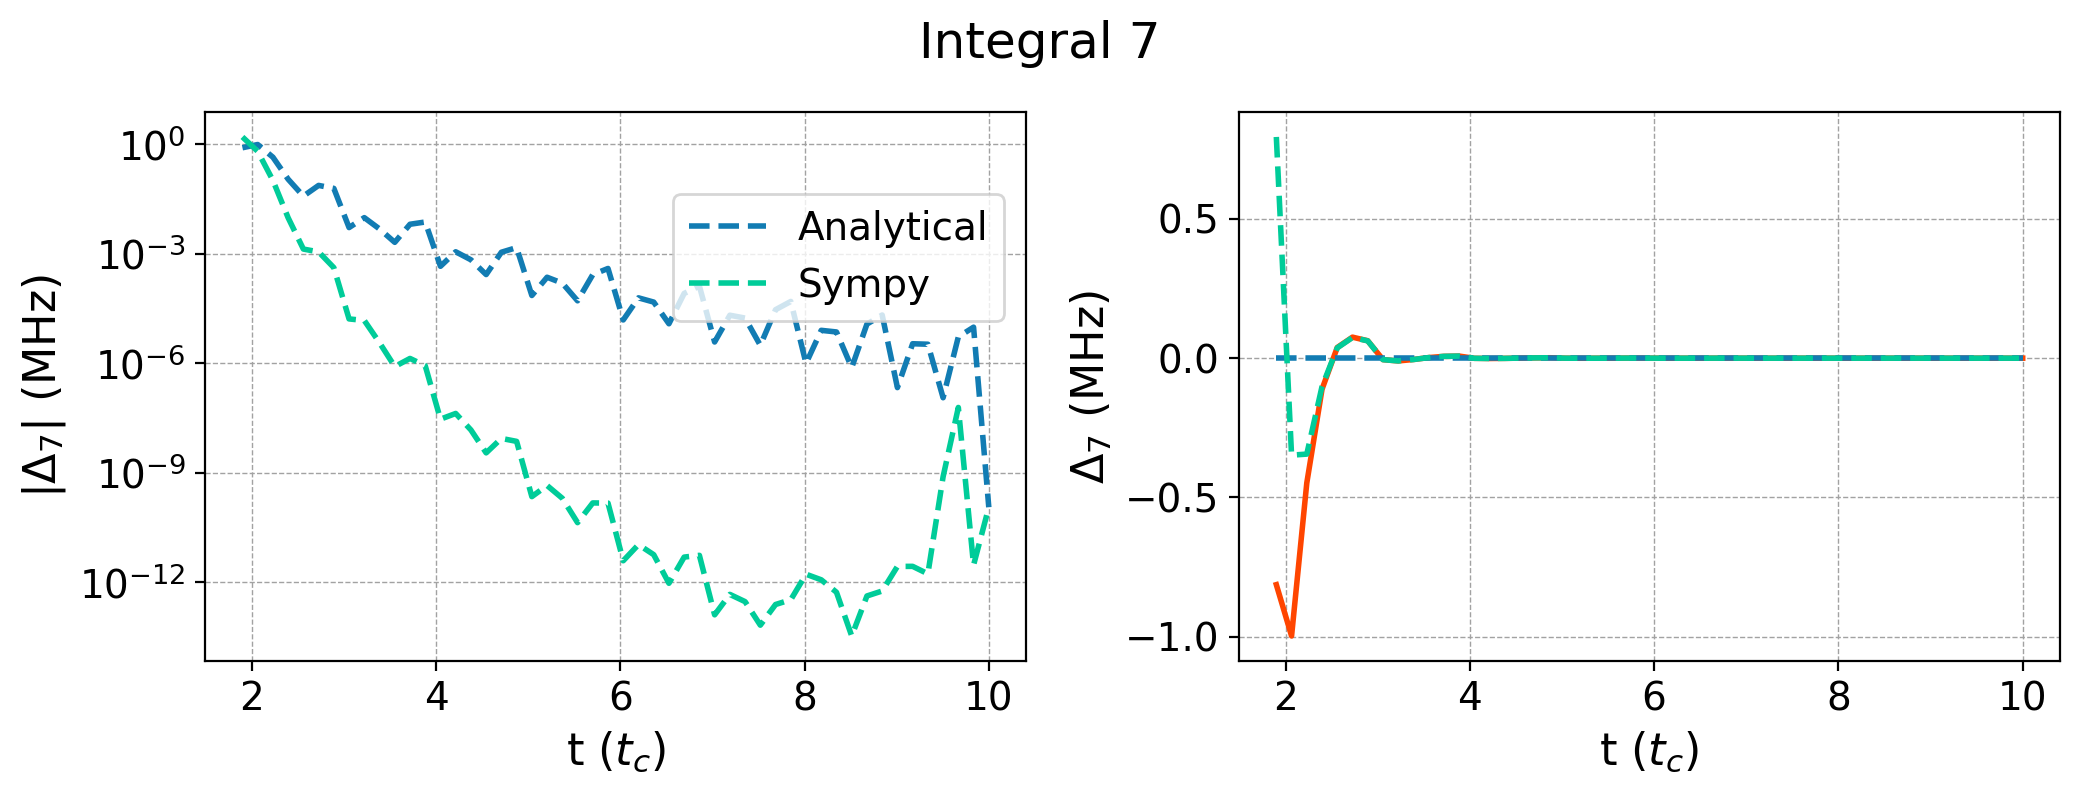

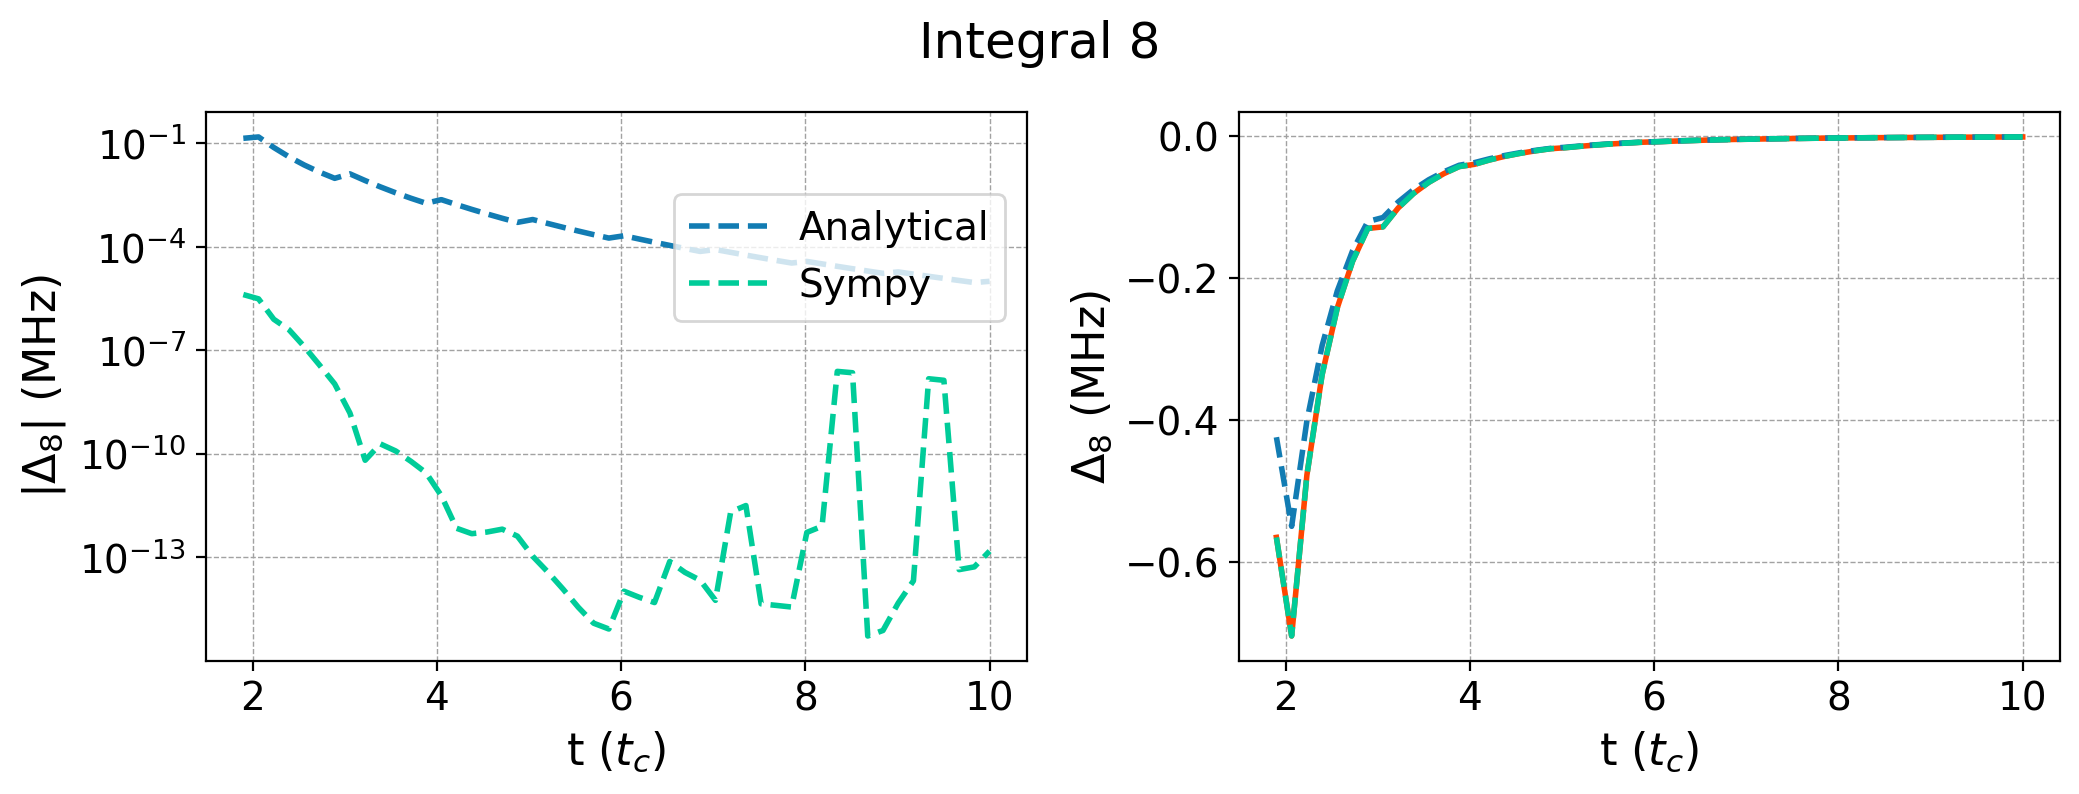

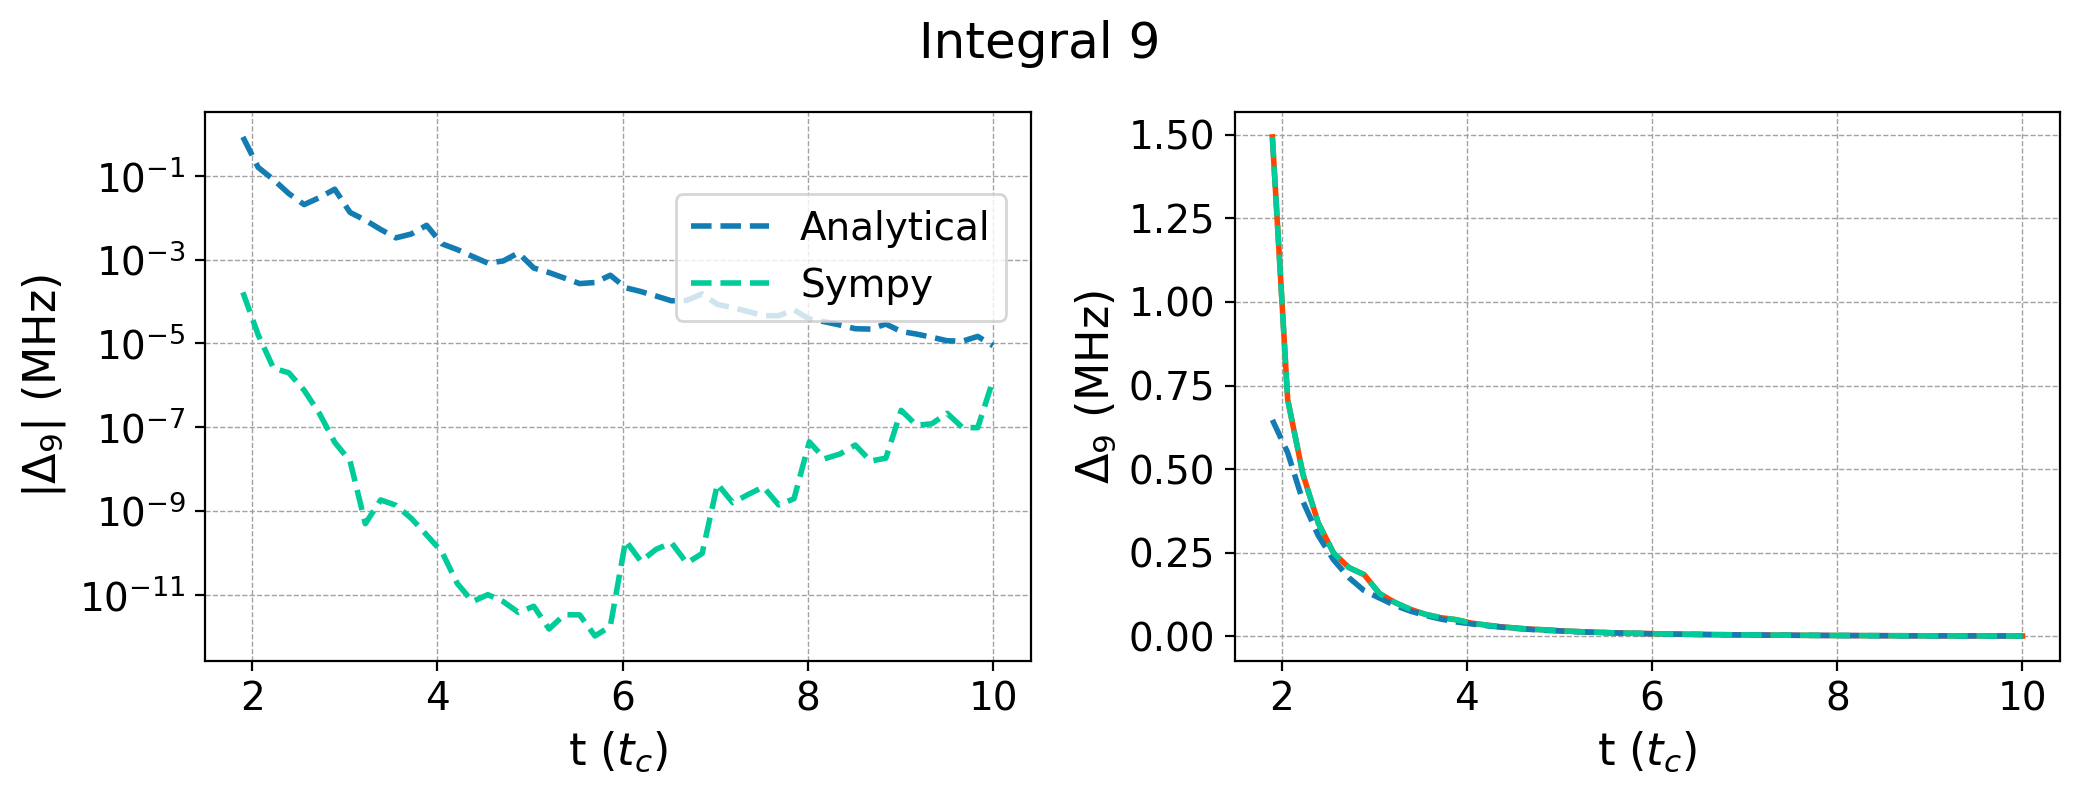

In [76]:
# Plot stuff
for idx in range(9):
    fig,ax = plt.subplots(1, 2, figsize=(10.5,4), dpi=200)
    fig.suptitle(f"Integral {idx+1}")

    # Set grid color
    for _ax in ax:
        _ax.grid(color="#A2A2A2", linestyle="--", linewidth=0.5)

    ax[0].set_yscale("log")
    # ax[0].plot(tgs*wd/np.pi, np.abs(numerical_results[idx,:]), color=colors["red"], linewidth=2, label="Numerical")
    # ax[0].plot(tgs*wd/np.pi, np.abs(analytical_results[idx,:]), color=colors["blue"], linestyle="--", linewidth=2, label="Analytical")
    # ax[0].plot(tgs*wd/np.pi, np.abs(sympy_results[idx,:]), color=colors["green"], linestyle="--", linewidth=2, label="Sympy")
    ax[0].plot(tgs*wd/np.pi, np.abs(numerical_results[idx,:]-analytical_results[idx,:]), color=colors["blue"], linestyle="--", linewidth=2, label="Analytical")
    ax[0].plot(tgs*wd/np.pi, np.abs(numerical_results[idx,:]-sympy_results[idx,:]), color=colors["green"], linestyle="--", linewidth=2, label="Sympy")

    ax[1].plot(tgs*wd/np.pi, numerical_results[idx,:], color=colors["red"], linewidth=2)
    ax[1].plot(tgs*wd/np.pi, analytical_results[idx,:], color=colors["blue"], linewidth=2, linestyle="--")
    ax[1].plot(tgs*wd/np.pi, sympy_results[idx,:], color=colors["green"], linewidth=2, linestyle="--")

    ax[0].set_xlabel(r"t $(t_c)$")
    ax[1].set_xlabel(r"t $(t_c)$")
    ax[0].set_ylabel(rf"$\vert \Delta_{idx+1} \vert$ (MHz)")
    ax[1].set_ylabel(rf"$\Delta_{idx+1}$ (MHz)")

    ax[0].legend(loc=[0.57,0.62])

    # if np.min(np.abs(analytical_results[idx,:]))<1e-6:
    #     ax[0].set_ylim(bottom=1e-6)
    
    fig.tight_layout()

In [20]:
# Plot total detuning
detuning_result_numerical =  2*np.sum(numerical_results, axis=0)
detuning_result_analytical = 2*np.sum(analytical_results, axis=0)
detuning_result_sympy = 2*np.sum(sympy_results, axis=0)

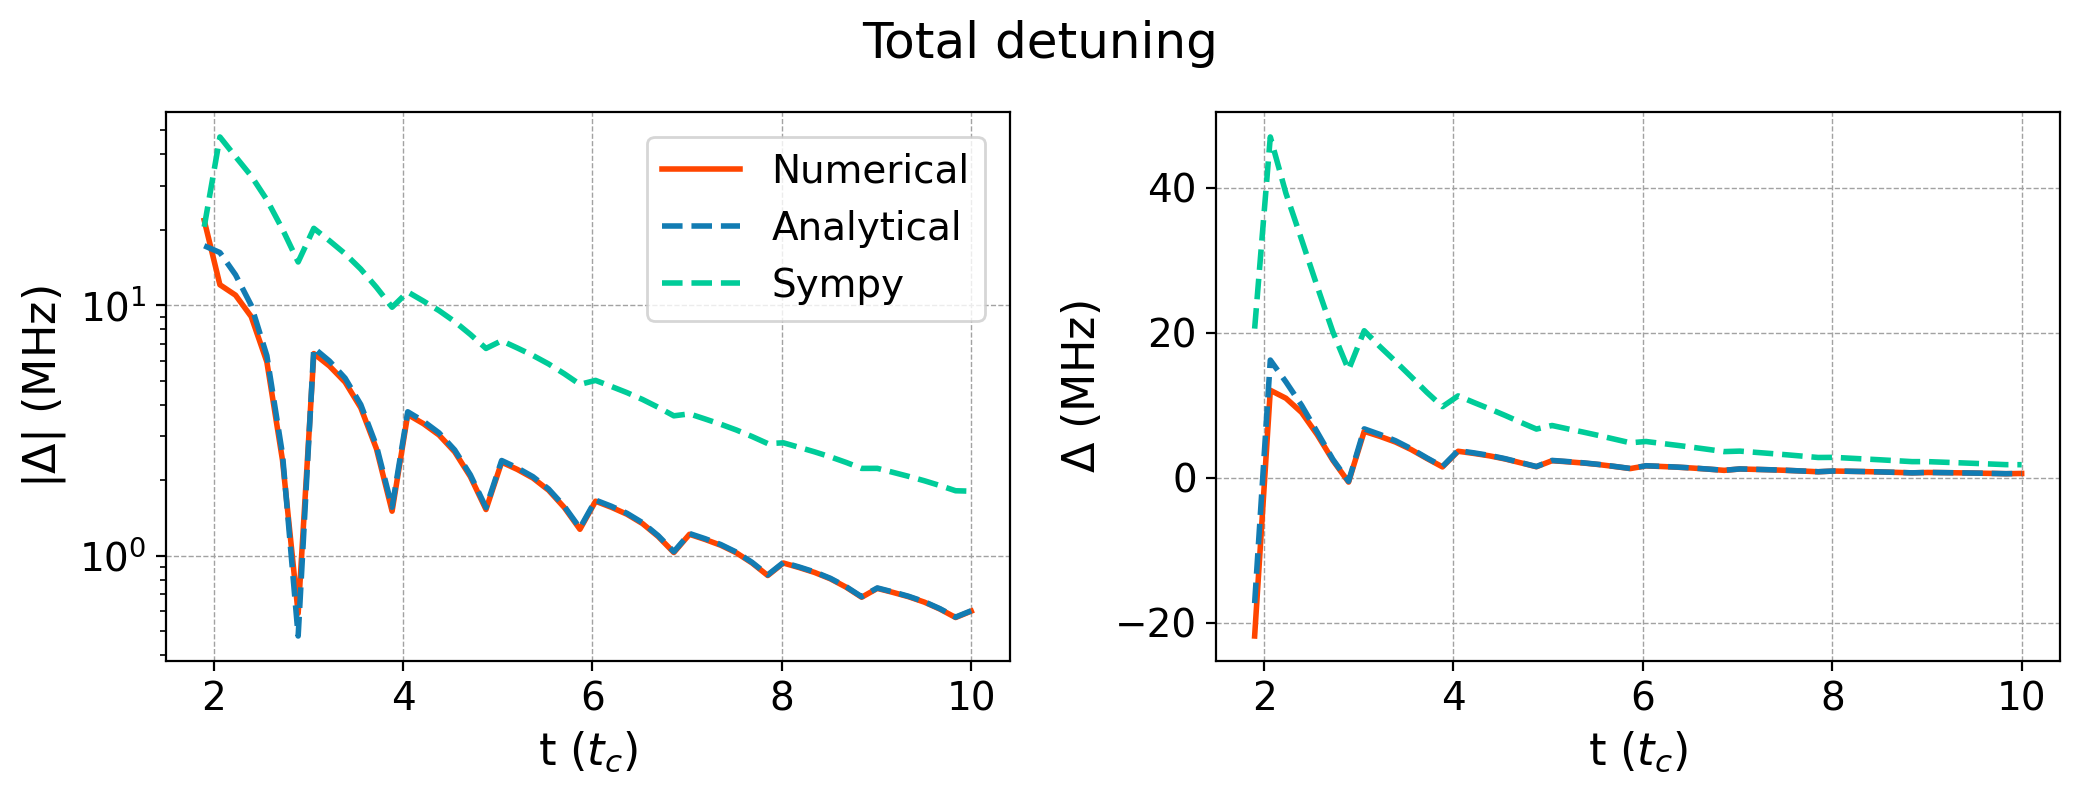

In [21]:
fig,ax = plt.subplots(1, 2, figsize=(10.5,4), dpi=200)
fig.suptitle(f"Total detuning")

# Set grid color
for _ax in ax:
    _ax.grid(color="#A2A2A2", linestyle="--", linewidth=0.5)

ax[0].set_yscale("log")
ax[0].plot(tgs*wd/np.pi, np.abs(detuning_result_numerical), color=colors["red"], linewidth=2, label="Numerical")
ax[0].plot(tgs*wd/np.pi, np.abs(detuning_result_analytical), color=colors["blue"], linestyle="--", linewidth=2, label="Analytical")
ax[0].plot(tgs*wd/np.pi, np.abs(detuning_result_sympy), color=colors["green"], linestyle="--", linewidth=2, label="Sympy")

ax[1].plot(tgs*wd/np.pi, detuning_result_numerical, color=colors["red"], linewidth=2)
ax[1].plot(tgs*wd/np.pi, detuning_result_analytical, color=colors["blue"], linewidth=2, linestyle="--")
ax[1].plot(tgs*wd/np.pi, detuning_result_sympy, color=colors["green"], linewidth=2, linestyle="--")

ax[0].set_xlabel(r"t $(t_c)$")
ax[1].set_xlabel(r"t $(t_c)$")
ax[0].set_ylabel(r"$\vert \Delta \vert$ (MHz)")
ax[1].set_ylabel(r"$\Delta$ (MHz)")

ax[0].legend(loc=[0.57,0.62])

fig.tight_layout()

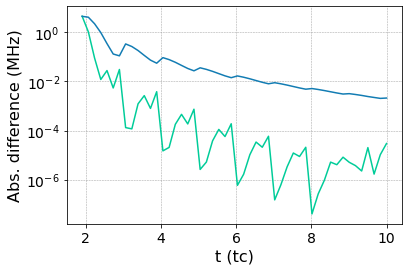

In [22]:
fig,ax = plt.subplots()
ax.grid(color="#A2A2A2", linestyle="--", linewidth=0.5)
ax.set_xlabel("t (tc)")
ax.set_ylabel("Abs. difference (MHz)")
ax.set_yscale("log")
ax.plot(tgs*wd/np.pi, np.abs(detuning_result_sympy-detuning_result_numerical), color=colors["green"])
ax.plot(tgs*wd/np.pi, np.abs(detuning_result_analytical-detuning_result_numerical), color=colors["blue"])